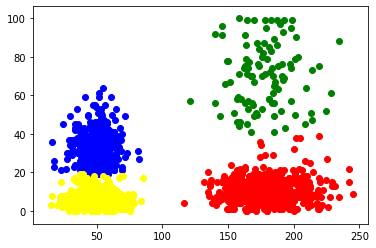

1
719601.5383469033


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import sqrt
import pandas as pd

class kMeanClustering():

    # Intializing value
    def __init__(self, n_clusters=2 ):

        self.n_clusters= n_clusters
        self.data      = []
        self.centroids = []
        self.old_centroids = [[0,0] for i in range(0,n_clusters)]
        self.clusters  = {i:[] for i in range(0,n_clusters) }
        
    #to calculate distance
    def distance(self, centroid, point):
        return sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2)


    #to calculate lowest distance for finding cluster
    def find_index_of_min(self, li):
        lowest_index = 0
        lowest_value = li[0]

        for i in range(len(li)):
            if li[i] < lowest_value:
                lowest_value = li[i]
                lowest_index = i

        return lowest_index

    # Change in centroid
    def change_in_centroids(self):
        change = 0
        for i in range(self.n_clusters):
            change = change + self.distance(self.old_centroids[i],self.centroids[i])
        return change

    # Plotting graph
    def plot_cluster(self):

        c = ["red","blue","green","yellow"]
        p = 0
        for j in range(self.n_clusters):
            x = []
            y = []
            for one_cluster in self.clusters[j]:
                x.append(one_cluster[0])
                y.append(one_cluster[1])
            plt.scatter(x,y,color=c[p])
            plt.scatter(self.centroids[j][0],self.centroids[j][1],color=c[p],marker="+")
            p = p+1
        plt.show()

    # Fitting model
    def fit(self, x):

        self.data = x
        #random cluster formation
        data_x = []
        data_y = []
        for i in self.data:
            data_x.append(i[0])
            data_y.append(i[1])
        
        for i in range( self.n_clusters ):
            self.centroids.append([randint(int(min(data_x)),int(max(data_x))),randint(int(min(data_y)),int(max(data_y)))] )

        while True:
            self.clusters = {i:[] for i in range(0,self.n_clusters) }
            #Assigning points to new clusters
            for point in self.data:

                distance_from_centroids = []
                for one_centroid in self.centroids:
                    distance_from_centroids.append( self.distance(one_centroid, point) )

                    #appending point to that cluster for which lowest distance was found
                point_in_cluster = self.find_index_of_min(distance_from_centroids)
                self.clusters[ point_in_cluster ].append( point )
                
            #Updating centroids:
            for i in range(0, self.n_clusters):

                self.old_centroids = [ i for i in self.centroids]

                total = [0,0]
                mean = [0,0]
                for j in self.clusters[i]:
                    total[0] = total[0] + j[0]
                    total[1] = total[1] + j[1]
                    
                try:
                    mean[0] = total[0] / len( self.clusters[i] )
                    mean[1] = total[1] / len( self.clusters[i] )
                except:
                    mean = self.centroids[i]

                self.centroids[i] =  mean
                
            value = self.change_in_centroids()
            if value == 0:
                break
        self.plot_cluster()


    #to predict one value only for now
    def predict(self, one_x):
        
        distance = []
        
        for i in self.centroids:
            distance.append(self.distance(i,one_x))
        
        min_distance = min(distance)
        for i in range(len(distance)):
            if min_distance == distance[i]:
                return i
                
    #WCSS value
    def score(self):
        score = 0
        score_value = [[] for i in range(self.n_clusters)]
        for i in range(self.n_clusters):
            total = 0
            for j in self.clusters[i]:
                total = total + (self.distance(self.centroids[i],j)**2)
            score_value[i].append(total)
        for i in score_value:
            score = score + i[0]
        return score
        

if __name__ == "__main__":

    
    delivery = pd.read_csv("driver_delivery_speed.csv",sep="\t")
    delivery = delivery.drop("Driver_ID",1)
    
    x = delivery.values
    k     = 4
    model = kMeanClustering(k)

    model.fit(x)

    
    prediction = model.predict([100,20])
    print(prediction)
    
    score = model.score()

    print(score)
    